# Imports for the project

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

# Import of project data + cleaning

In [6]:
mel_cities = gpd.read_file('2024-project/2024-project/cartographic-resources/mel_communes.zip')
nordData = gpd.read_file('2024-project/2024-project/cartographic-resources/IRIS-GE_2-0_SHP_LAMB93_D059-2020/IRIS_GE.SHX')
dfe = gpd.read_parquet('2024-project/2024-project/cartographic-resources/mel.parquet')
bruit = gpd.read_file('2024-project/2024-project/donnees-bruit-nuit.zip')

In [135]:
lilleMetropolis = nordData[nordData.INSEE_COM.isin(mel_cities['insee']) ]
lilleMetropolis = lilleMetropolis.to_crs(3950)
lilleMetropolis.reset_index(drop=True)
True

True

In [133]:
bruit = bruit.to_crs(3950)
bruit = bruit.reset_index(drop=True)

# Objectives: 

## Assign a score for each Iris based on:
- Noise level ( The more, the better to avoid quiet area)
- Proximity to business area (The closest, the better)
- Population density (The closest, the better)
## Selection of Iris
- find the number x of containers to build based on the company budget
- Only keep the top x Iris, based on the agregation of their scores

# Assigning a score to each iris based on the noise level in the area.

### Map of noise in the Lille metropolitan area.

<Axes: >

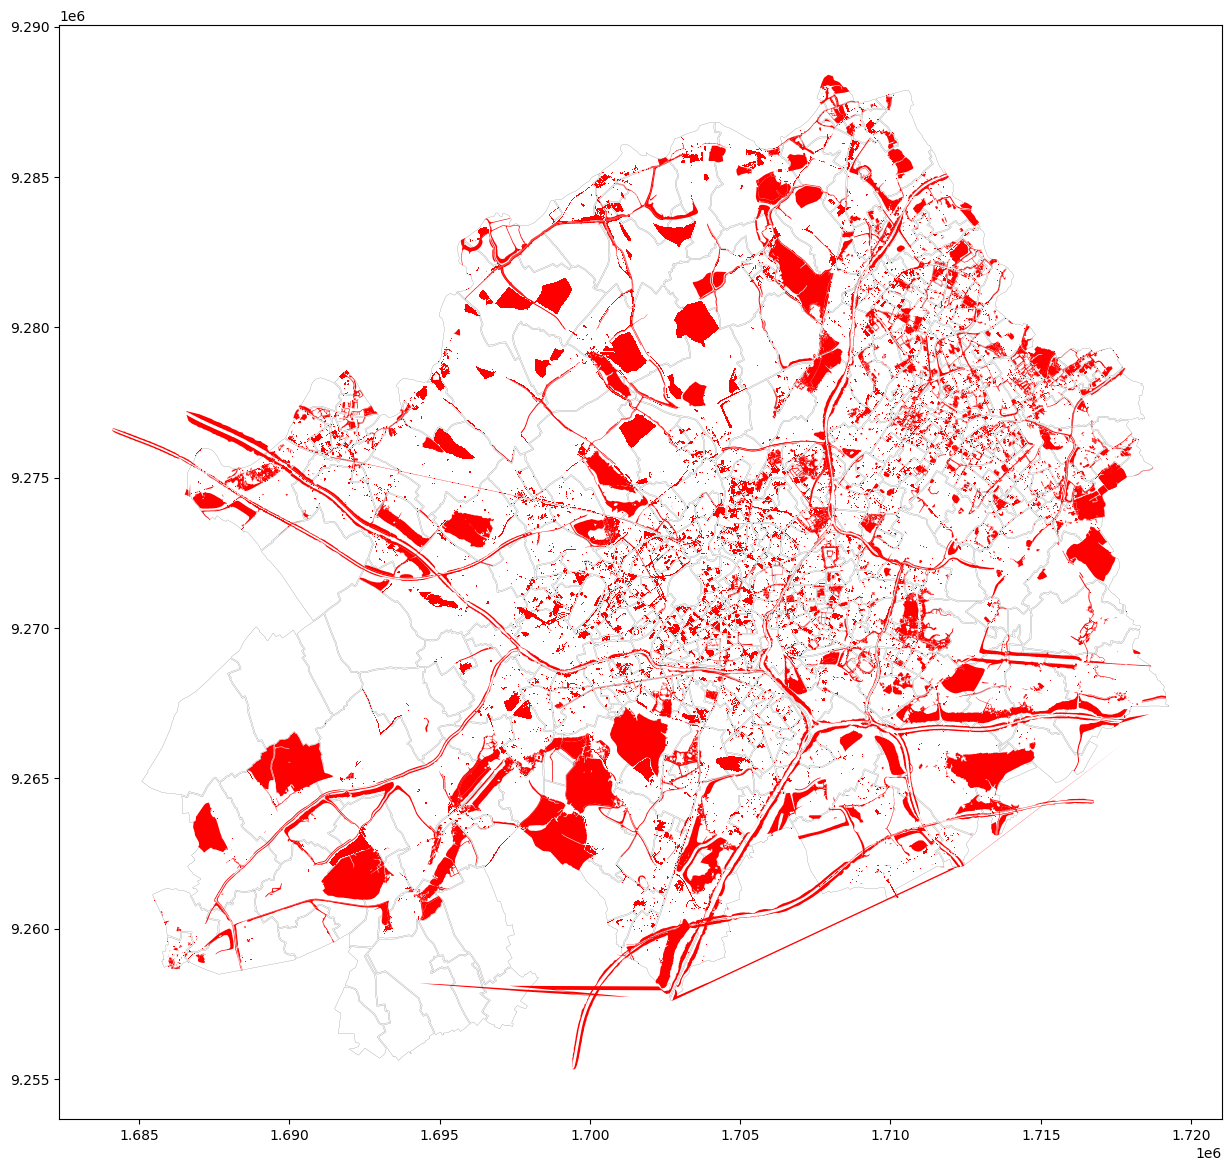

In [136]:
ax = lilleMetropolisBuffed.plot(color='white',edgecolor='black',linewidth=0.1,figsize=(15,15))
bruit.plot(ax=ax, color='red',linewidth=0.3,figsize=(15,15))

# Map of noise levels for each Iriss

## Aggregate all noise data by iris and calculate the geometric area of their intersection.




In [103]:

lilleMetropolis['surface_iris'] = lilleMetropolis.area

result = gpd.overlay(lilleMetropolis, bruit, how='intersection')
result['intersection_area'] = result.geometry
grouped_result = result.groupby('CODE_IRIS')['intersection_area'].apply(lambda x: x.unary_union).reset_index()

combined_geometries = gpd.GeoDataFrame(grouped_result, geometry='intersection_area')



### Add a new colmn on lilleMetropolis coresponding to the ratio of its area and the area off all the noise in the Iris

In [138]:
lilleMetropolis = lilleMetropolis.merge(combined_geometries, how='left', on='CODE_IRIS')
lilleMetropolis['ratio_intersection'] = lilleMetropolis['intersection_area'].area / lilleMetropolis.geometry.area
lilleMetropolis['ratio_intersection'] = lilleMetropolis['ratio_intersection'].fillna(0)

### Ploting of the map, using a gradient

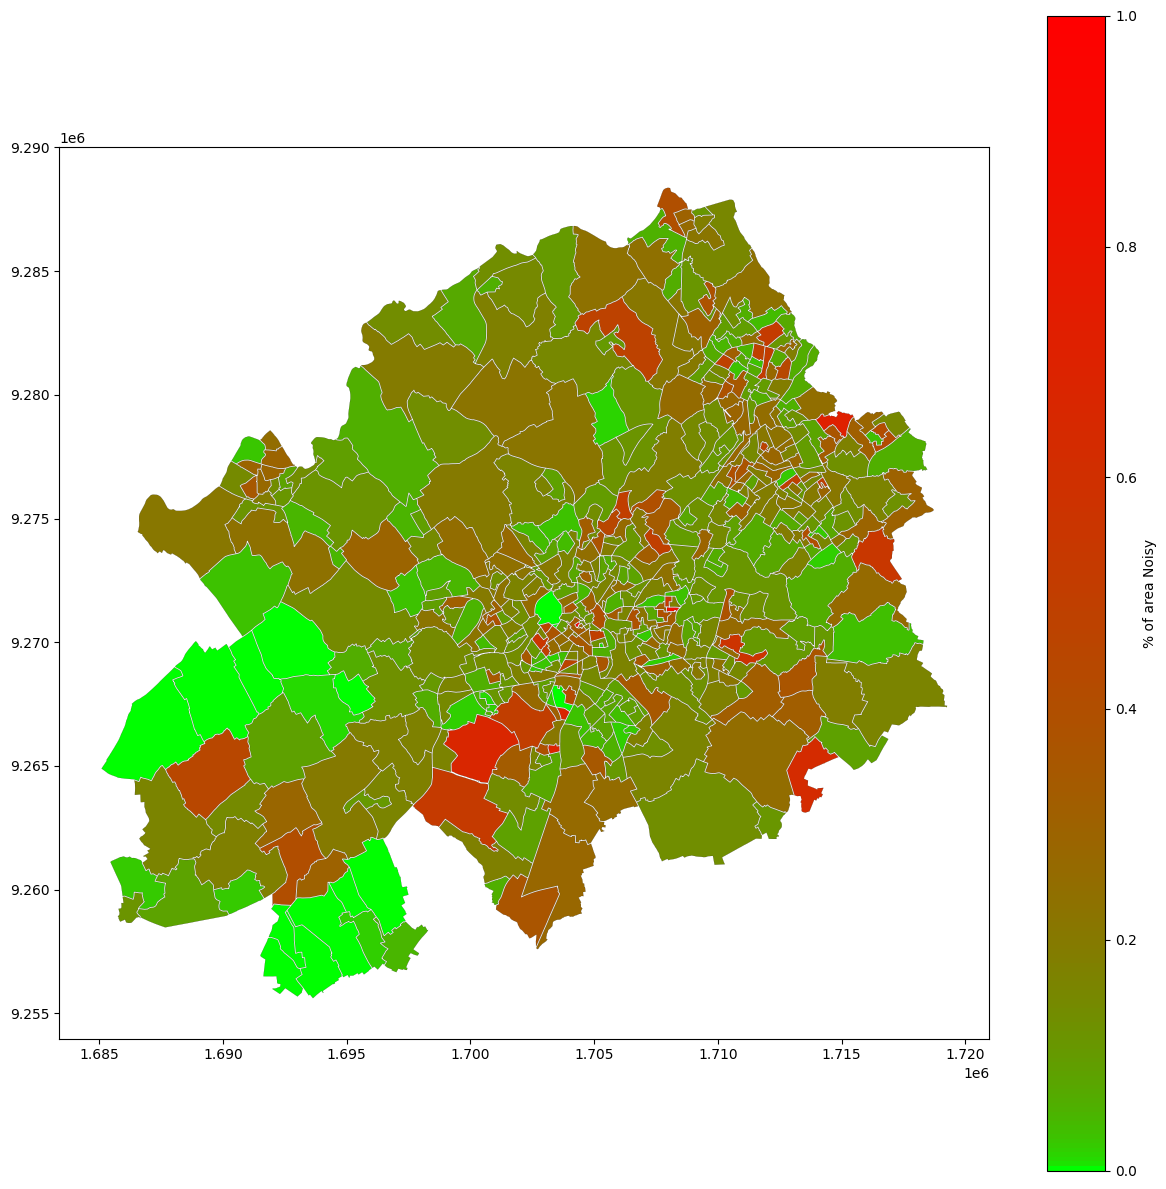

In [127]:
colors = [(0, 1, 0), (1, 0, 0)]  # Green to Red
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256, gamma=0.4)

norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(cmap=cmap, norm=norm)

ax = lilleMetropolis.plot(column='ratio_intersection', cmap=cmap, linewidth=0.1, edgecolor='black',
                                    legend=False, figsize=(15, 15))

cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='% of area Noisy')

plt.show()